In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('creditcard.csv')
df.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [4]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
x=df.iloc[:,2:4].values
y=df.iloc[:,-1].values


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()     
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
classifier.fit(x_train,y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [9]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

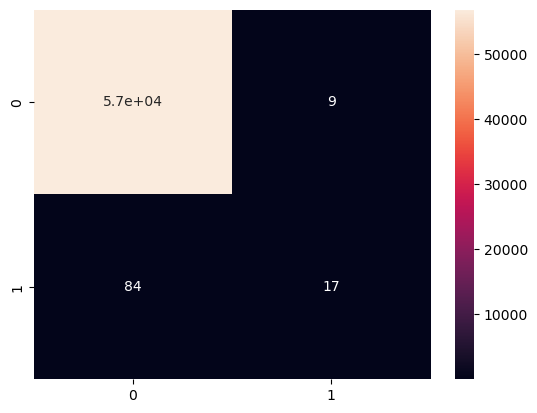

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)  
sns.heatmap(cm, annot=True)
plt.show()

In [13]:
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
print(cm)
print("Accuracy:", acc)

[[56852     9]
 [   84    17]]
Accuracy: 0.9983673326077034


In [16]:
from sklearn.tree import DecisionTreeClassifier
base_model=DecisionTreeClassifier(max_depth=1)


In [17]:
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier(estimator=base_model, n_estimators=50, learning_rate=1.0, random_state=42)
classifier.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [18]:
y_pred=classifier.predict(x_test)


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)  
print(cm)
acc=accuracy_score(y_test,y_pred)
print("Accuracy:", acc)

[[56845    16]
 [   86    15]]
Accuracy: 0.9982093325374811
